# Create new tasks
This file is used to create new tasks or new scenes.

### New Task: Flip
I add a new predicate "upside_down" to the predicate dictionary, it can be used to check if the object is upside down. With this predicate, we can create a new task "Flip the basket".

In [ ]:
import numpy as np
from libero.libero.utils.bddl_generation_utils import get_xy_region_kwargs_list_from_regions_info
from libero.libero.utils.mu_utils import register_mu, InitialSceneTemplates
from libero.libero.utils.task_generation_utils import register_task_info, generate_bddl_from_task_info

@register_mu(scene_type="floor")
class check_basket_upside_down(InitialSceneTemplates):
    def __init__(self):
        # 保持相同的物体配置
        fixture_num_info = {
            "floor": 1,
        }

        object_num_info = {
            "alphabet_soup": 1,
            "basket": 1,
            "salad_dressing": 1,
            "cream_cheese": 1,
            "milk": 1,
            "bbq_sauce": 1,
            "butter": 1,
            "orange_juice": 1,
        }

        super().__init__(
            workspace_name="floor",
            fixture_num_info=fixture_num_info,
            object_num_info=object_num_info
        )

    def define_regions(self):
        # 保持相同的区域定义
        self.regions.update(
            self.get_region_dict(
                region_centroid_xy=[0.0, 0.26],
                region_name="bin_region",
                target_name=self.workspace_name,
                region_half_len=0.01
            )
        )

        self.regions.update(
            self.get_region_dict(
                region_centroid_xy=[-0.12, -0.24],
                region_name="target_object_region",
                target_name=self.workspace_name,
                region_half_len=0.025
            )
        )

        other_objects_positions = [
            [0.05, -0.1],
            [-0.15, 0.06],
            [0.1, -0.2],
            [0.15, 0.03],
            [-0.2, -0.08],
            [-0.3, 0.09]
        ]

        for i, pos in enumerate(other_objects_positions):
            self.regions.update(
                self.get_region_dict(
                    region_centroid_xy=pos,
                    region_name=f"other_object_region_{i}",
                    target_name=self.workspace_name,
                    region_half_len=0.025
                )
            )

        self.xy_region_kwargs_list = get_xy_region_kwargs_list_from_regions_info(self.regions)

    @property
    def init_states(self):
        # 保持相同的初始状态
        states = [
            ("On", "alphabet_soup_1", "floor_target_object_region"),
            ("On", "salad_dressing_1", "floor_other_object_region_0"),
            ("On", "cream_cheese_1", "floor_other_object_region_1"),
            ("On", "milk_1", "floor_other_object_region_2"),
            ("On", "bbq_sauce_1", "floor_other_object_region_3"),
            ("On", "butter_1", "floor_other_object_region_4"),
            ("On", "orange_juice_1", "floor_other_object_region_5"),
            ("On", "basket_1", "floor_bin_region"),
        ]
        return states

def main():
    # 修改任务信息
    scene_name = "check_basket_upside_down"
    language = "Flip the basket upside down"  # 新的任务描述
    
    register_task_info(
        language,
        scene_name=scene_name,
        objects_of_interest=["basket_1"],  # 只关注篮子
        goal_states=[("UpsideDown", "basket_1")]  # 新的目标状态：检查篮子是否倒扣
    )

    # 生成BDDL文件
    bddl_file_path = "output/bddl_files"
    bddl_file_names, failures = generate_bddl_from_task_info(folder=bddl_file_path)
    
    print("生成的BDDL文件:", bddl_file_names)
    if failures:
        print("生成失败的任务:", failures)

    # 创建环境并显示
    from libero.libero.envs import OffScreenRenderEnv
    from IPython.display import display
    from PIL import Image

    env_args = {
        "bddl_file_name": bddl_file_names[0],
        "camera_heights": 256,
        "camera_widths": 256
    }

    env = OffScreenRenderEnv(**env_args)
    obs = env.reset()
    display(Image.fromarray(obs["agentview_image"][::-1]))

if __name__ == "__main__":
    main()

### New Task: Put everything(>=3) in the plate / basket / pot
This task aims to test the agent's ability to handle long sequences of actions.

output/bddl_files/KITCHEN_PLATE_TASK_put_everything_in_the_plate.bddl
output/bddl_files/KITCHEN_PLATE_TASK_put_everything_in_the_plate.bddl
output/bddl_files/KITCHEN_PLATE_TASK_put_everything_in_the_plate.bddl
output/bddl_files/KITCHEN_PLATE_TASK_put_everything_in_the_plate.bddl
Succefully generated: 5
生成的BDDL文件: ['output/bddl_files/KITCHEN_PLATE_TASK_put_everything_in_the_plate.bddl', 'output/bddl_files/KITCHEN_PLATE_TASK_put_everything_in_the_plate.bddl', 'output/bddl_files/KITCHEN_PLATE_TASK_put_everything_in_the_plate.bddl', 'output/bddl_files/KITCHEN_PLATE_TASK_put_everything_in_the_plate.bddl', 'output/bddl_files/KITCHEN_PLATE_TASK_put_everything_in_the_plate.bddl']
problem_info {'problem_name': 'libero_kitchen_tabletop_manipulation', 'domain_name': 'robosuite', 'language_instruction': 'put everything in the plate'}
TASK_MAPPING {'libero_tabletop_manipulation': <class 'libero.libero.envs.problems.libero_tabletop_manipulation.Libero_Tabletop_Manipulation'>, 'libero_coffee_table_ma

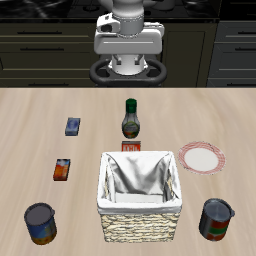

In [6]:
import numpy as np
from libero.libero.utils.bddl_generation_utils import get_xy_region_kwargs_list_from_regions_info
from libero.libero.utils.mu_utils import register_mu, InitialSceneTemplates
from libero.libero.utils.task_generation_utils import register_task_info, generate_bddl_from_task_info
@register_mu(scene_type="kitchen")
class KitchenPlateTask(InitialSceneTemplates):
    def __init__(self):
        fixture_num_info = {
            "kitchen_table": 1,  # 使用厨房桌子
        }

        object_num_info = {
            "plate": 1,     # 添加盘子
            "butter": 1,    # 添加黄油
            "cream_cheese": 1,  # 添加奶油奶酪
            "alphabet_soup": 1,  # 添加字母汤
            "basket": 1,    # 添加篮子
            "salad_dressing": 1,  # 添加沙拉酱
            "milk": 1,      # 添加牛奶
            "tomato_sauce": 1,  # 添加番茄酱
        }

        super().__init__(
            workspace_name="kitchen_table",
            fixture_num_info=fixture_num_info,
            object_num_info=object_num_info
        )

    def define_regions(self):
        # 为盘子定义区域
        self.regions.update(
            self.get_region_dict(region_centroid_xy=[0.0, 0.2], 
                               region_name="plate_init_region", 
                               target_name=self.workspace_name, 
                               region_half_len=0.025)
        )

        # 为其他物体定义区域
        positions = [
            [0.0, -0.2],    # butter
            [-0.2, -0.2],   # cream_cheese
            [0.2, -0.2],    # alphabet_soup
            [0.2, 0.0],     # basket
            [-0.2, 0.0],    # salad_dressing
            [0.0, 0.0],     # milk
            [0.2, 0.2],     # tomato_sauce
        ]
        
        objects = ["butter", "cream_cheese", "alphabet_soup", "basket", 
                  "salad_dressing", "milk", "tomato_sauce"]
        
        for pos, obj in zip(positions, objects):
            self.regions.update(
                self.get_region_dict(region_centroid_xy=pos,
                                   region_name=f"{obj}_init_region",
                                   target_name=self.workspace_name,
                                   region_half_len=0.025)
            )

        self.xy_region_kwargs_list = get_xy_region_kwargs_list_from_regions_info(self.regions)

    @property
    def init_states(self):
        states = [
            ("On", "plate_1", "kitchen_table_plate_init_region"),
            ("On", "butter_1", "kitchen_table_butter_init_region"),
            ("On", "cream_cheese_1", "kitchen_table_cream_cheese_init_region"),
            ("On", "alphabet_soup_1", "kitchen_table_alphabet_soup_init_region"),
            ("On", "basket_1", "kitchen_table_basket_init_region"),
            ("On", "salad_dressing_1", "kitchen_table_salad_dressing_init_region"),
            ("On", "milk_1", "kitchen_table_milk_init_region"),
            ("On", "tomato_sauce_1", "kitchen_table_tomato_sauce_init_region")
        ]
        return states

# 注册任务信息
scene_name = "kitchen_plate_task"
language = "Put everything in the plate"
register_task_info(language,
                  scene_name=scene_name,
                  objects_of_interest=["plate_1", "butter_1", "cream_cheese_1", 
                                     "alphabet_soup_1", "basket_1", "salad_dressing_1",
                                     "milk_1", "tomato_sauce_1"],
                  goal_states=[
                      ("On", "butter_1", "plate_1"),
                      ("On", "cream_cheese_1", "plate_1"),
                      ("On", "alphabet_soup_1", "plate_1"),
                      ("On", "basket_1", "plate_1"),
                      ("On", "salad_dressing_1", "plate_1"),
                      ("On", "milk_1", "plate_1"),
                      ("On", "tomato_sauce_1", "plate_1")
                  ]
)

# 生成BDDL文件
bddl_file_path = "output/bddl_files"
bddl_file_names, failures = generate_bddl_from_task_info(folder=bddl_file_path)

print("生成的BDDL文件:", bddl_file_names)
if failures:
    print("生成失败的任务:", failures)

# 创建环境并显示
from libero.libero.envs import OffScreenRenderEnv
from IPython.display import display
from PIL import Image

env_args = {
    "bddl_file_name": bddl_file_names[0],
    "camera_heights": 256,
    "camera_widths": 256
}

env = OffScreenRenderEnv(**env_args)
obs = env.reset()
display(Image.fromarray(obs["agentview_image"][::-1]))
